
# **I load all the important library for this project**


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import PIL
from tensorflow import keras

In [ ]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
from PIL import Image, ImageEnhance  # For image processing and enhancement
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adam  # For optimizer
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from sklearn.utils import shuffle  # For shuffling the data


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kagglecomabubakar","key":"1ec7345524fb7ca73567796c2be50455"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')






Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 1.15GB/s]

In [ ]:
!ls

brain-tumor-mri-dataset  drive	kaggle.json  sample_data


In [ ]:
!ls brain-tumor-mri-dataset

Testing  Training


In [ ]:
!ls /content/brain-tumor-mri-dataset/Training

glioma	meningioma  notumor  pituitary


In [ ]:
import os
data_dir="/content/brain-tumor-mri-dataset/Training"
os.listdir(data_dir)

['meningioma', 'glioma', 'notumor', 'pituitary']

In [ ]:
os.path.isdir(data_dir)

True

In [ ]:
import os
data_testing="/content/brain-tumor-mri-dataset/Testing"
os.listdir(data_dir)

['meningioma', 'glioma', 'notumor', 'pituitary']

In [ ]:
type(data_dir)

str

In [ ]:
type(os.listdir(data_dir))

list

In [ ]:
data_train="/content/brain-tumor-mri-dataset/Training"
data_testing="/content/brain-tumor-mri-dataset/Testing"


train_path =[]
train_label =[]

for label in os.listdir(data_train):
  dir_path = os.path.join(data_train,label)
  for image in os.listdir(dir_path):
    train_path.append(os.path.join(data_train, label, image))
    train_label.append(label)

train_path , train_label = shuffle(train_path, train_label)

In [ ]:
train_label[:5]

['meningioma', 'pituitary', 'glioma', 'notumor', 'glioma']

In [ ]:
train_path[:5]

['/content/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0038.jpg',
 '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg',
 '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0538.jpg',
 '/content/brain-tumor-mri-dataset/Training/notumor/Tr-no_0180.jpg',
 '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0772.jpg']

In [ ]:

os.listdir(data_train)

['glioma', 'pituitary', 'meningioma', 'notumor']

In [ ]:
train_label[:5]

['meningioma', 'pituitary', 'glioma', 'notumor', 'glioma']

In [ ]:
# Now for testing directory

data_testing="/content/brain-tumor-mri-dataset/Testing"

test_path = []
test_label =[]

for label in os.listdir(data_testing):
  data_dir = os.path.join(data_testing , label)
  for image in os.listdir(data_dir):
    test_path.append(os.path.join(data_testing , label , image))
    test_label.append(label)


test_path , test_label = shuffle(test_path , test_label)

In [ ]:
test_path[:5]

['/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0221.jpg',
 '/content/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0008.jpg',
 '/content/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0134.jpg',
 '/content/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0170.jpg',
 '/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0052.jpg']

In [ ]:
test_label[:5]

['notumor', 'meningioma', 'meningioma', 'meningioma', 'notumor']

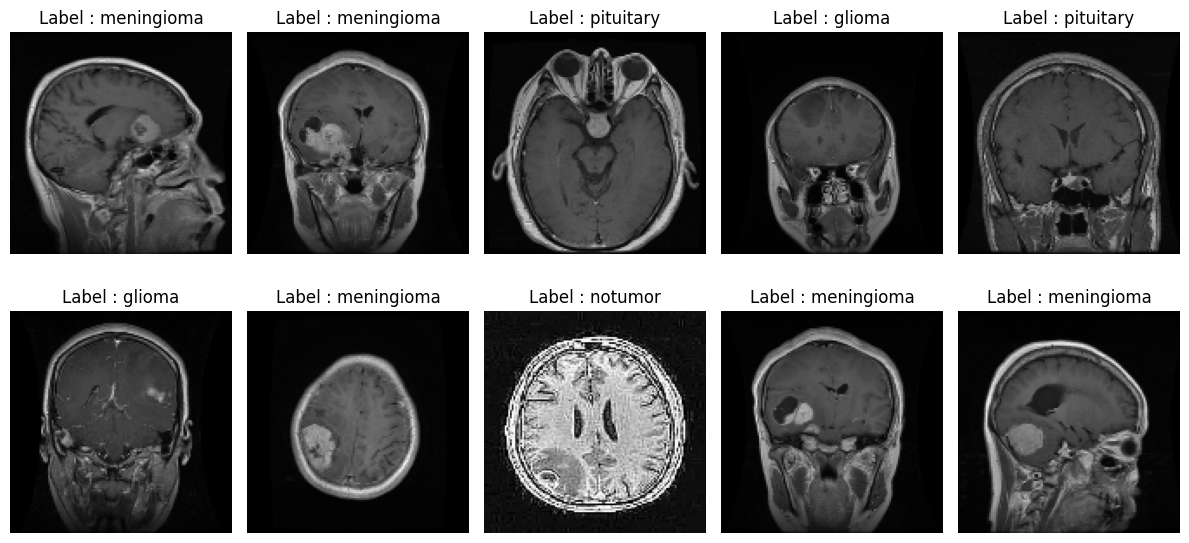

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image


#select indice for 10 images

random_indice = random.sample(range(len(train_path)),10)


# Create a image to display image in 2 rows

figure , axis = plt.subplots(2,5,figsize=(12,6))
axis = axis.ravel()


# Now show the image
for i, index in enumerate(random_indice):
  image = cv2.imread(train_path[index])
  image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (128, 128))
  axis[i].imshow(image)
  axis[i].set_title(f"Label : {train_label[index]}")
  axis[i].axis('off')


plt.tight_layout()
plt.show()


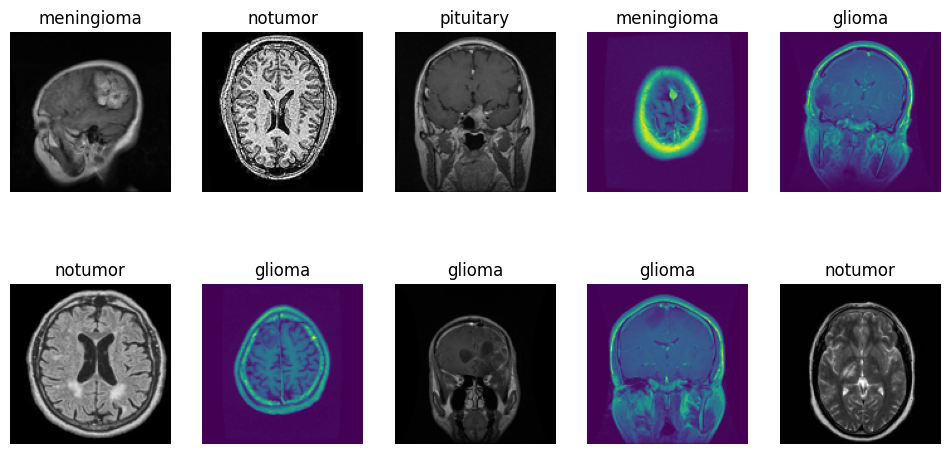

In [ ]:
import random
# import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, axis, show
from PIL import Image


#select indice for 10 images

random_indice = random.sample(range(len(train_path)),10)


# Create a image to display image in 2 rows

figure , axis = plt.subplots(2,5,figsize=(12,6))
axis = axis.ravel()

for i , index in enumerate(random_indice):
  image = Image.open(train_path[index])
  image = image.resize((128,128))
  axis[i].imshow(image)
  axis[i].set_title(train_label[index])
  axis[i].axis('off')

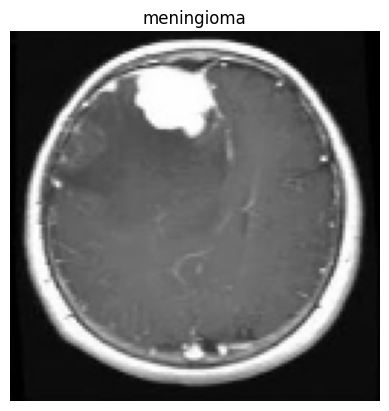

In [ ]:
import matplotlib.pyplot as plt

image = cv2.imread(test_path[1])
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128))
plt.imshow(image)

plt.axis('off')
plt.title(test_label[1])
plt.show()


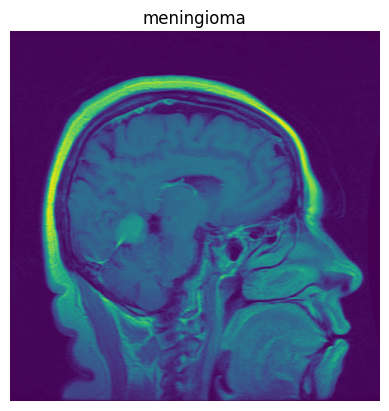

In [ ]:
image = Image.open(test_path[34])
plt.imshow(image)
plt.axis('off')
plt.title(test_label[34])
plt.show()

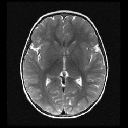

In [ ]:
path = "/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0145.jpg"

img = load_img(path, target_size=(128, 128))
img

img = np.array(img)
img




In [ ]:


# Load original image
path = "/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0145.jpg"
original = load_img(path, target_size=(128, 128))  # PIL image

# Generate multiple augmented versions
augmented_images = [augment_image(original.copy()) for _ in range(5)]

# Plot original + augmented
plt.figure(figsize=(12, 6))

# Original
plt.subplot(2, 3, 1)
plt.imshow(original)
plt.title("Original")
plt.axis("off")

# Augmented versions
for i, img in enumerate(augmented_images, start=2):
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.title(f"Augmented {i-1}")
    plt.axis("off")

plt.show()


NameError: name 'augment_image' is not defined

ValueError: num must be an integer with 1 <= num <= 6, not 9

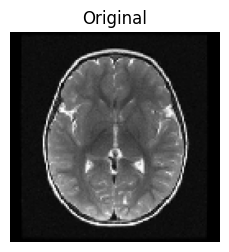

In [ ]:


# Load original image
path = "/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0145.jpg"
original = load_img(path, target_size=(128, 128))  # PIL image




# Plot original + augmented
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(original)
plt.title("Original")
plt.axis("off")


# Generate multiple augmented versions
augmented_images = augment_image(original.copy())

for augmented_images in range(5):
  plt.subplot(2, 3, i)
  plt.imshow(img)
  plt.title(f"Augmented {i-1}")
  plt.axis("off")

  plt.show()




# # Original
# plt.subplot(2, 3, 1)
# plt.imshow(original)
# plt.title("Original")
# plt.axis("off")

# # Augmented versions
# for i, img in enumerate(augmented_images, start=2):
#     plt.subplot(2, 3, i)
#     plt.imshow(img)
#     plt.title(f"Augmented {i-1}")
#     plt.axis("off")


In [ ]:

IMAGE_SIZE = 128

def augment_image(path):
    # Load image
    img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img = np.array(img)  # convert PIL → NumPy

    # Raw image (0–255 pixel values)
    raw_img = img.copy()

    # Apply augmentation
    image = Image.fromarray(np.uint8(img))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0   # Normalize [0,1]

    return raw_img, image


path = "/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0145.jpg"

raw, aug = augment_image(path)

print("Raw image values (0–255):")
print(raw[0:2, 0:5])   # print 2 rows × 5 cols

print("\nAugmented + Normalized image values (0–1):")
print(aug[0:2, 0:5])


In [ ]:
# Image Augmentation function
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))  # Random brightness
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))  # Random contrast
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encoding labels (convert label names to integers)
def encode_label(labels):
    unique_labels = os.listdir(data_train)  # Ensure unique labels are determined
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)


# Data generator for batching
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)  # Open and augment images
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)  # Encode labels
            yield batch_images, batch_labels  # Yield the batch

In [ ]:
# Model architecture
IMAGE_SIZE = 128  # Image size (adjust based on your requirements)
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer
model.add(base_model)  # Add VGG16 base model
model.add(Flatten())  # Flatten the output of the base model
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(len(os.listdir(data_train)), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Parameters
batch_size = 20
steps = int(len(train_path) / batch_size)  # Steps per epoch
epochs = 5

# Train the model
history = model.fit(datagen(train_path, train_label, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - loss: 0.6243 - sparse_categorical_accuracy: 0.7527
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 0.2457 - sparse_categorical_accuracy: 0.9070
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - loss: 0.1545 - sparse_categorical_accuracy: 0.9373
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - loss: 0.1171 - sparse_categorical_accuracy: 0.9594
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - loss: 0.1196 - sparse_categorical_accuracy: 0.9607


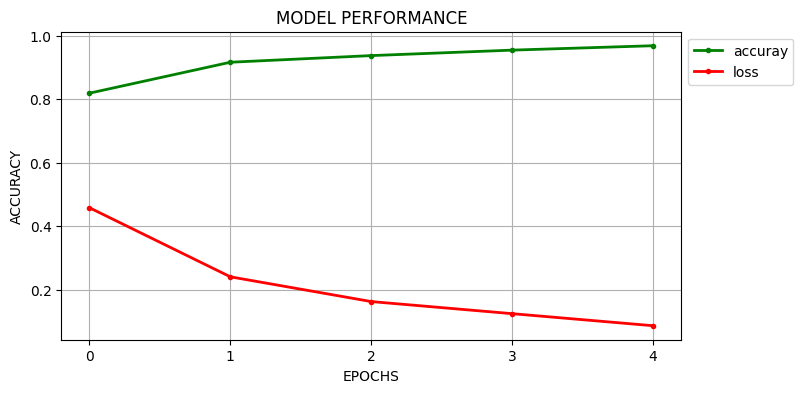

In [ ]:

plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', label='Training Accuracy', linewidth=2)

plt.plot(history.history['loss'],  '.r-' , label='Training Loss',linewidth=2)

plt.title("MODEL PERFORMANCE")

plt.xlabel("EPOCHS")

plt.ylabel("ACCURACY")
plt.xticks([x for x in range(epochs)])
plt.legend(['accuray','loss'],loc ='upper left' , bbox_to_anchor=(1,1))
plt.show()

#plt.plot(history.history['val_accuracy'],label='Validation Accuracy')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer


In [ ]:
test_images = open_images(test_path)
test_labels = encode_label(test_label)

test_predication = model.predict(test_images)
print("classification Report :")
print(classification_report(test_labels, np.argmax(test_predication, axis=1)))

In [ ]:

conf_matrix = confusion_matrix(test_labels, np.argmax(test_predication, axis=1))
print("Confusion Matrix :")
print(conf_matrix)

In [ ]:
conf_matrix = confusion_matrix(test_labels, np.argmax(test_predication, axis=1))
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=os.listdir(data_train), yticklabels=os.listdir(data_train))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


model.save('Brain_tumor_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("Brain_tumor_model.h5")

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

class_label =['pituitary', 'glioma', 'meningioma', 'notumor']



def detect_and_show(image_path, model):
  #load image
  image = load_img(image_path, target_size=(128,128))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)
  confidence_score =np.max(prediction, axis=1)[0]


  if class_label[predicted_class] == 'notumor':
    result = "Notumor Detected"
  else:
    result= f"Tumor: {class_label[predicted_class]}"

  plt.imshow(load_img(image_path))
  plt.axis('off')
  plt.title(f"{result}  . \n confidence : {confidence_score * 100 :.2f}")
  plt.show()

In [ ]:
image_path = '/content/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0001.jpg'

detect_and_show(image_path, model)

In [ ]:
image_path= '/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0200.jpg'
detect_and_show(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


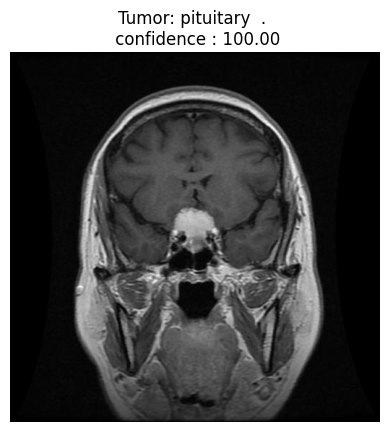

In [ ]:

image_path='/content/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0156.jpg'
detect_and_show(image_path, model)